<b>¡Hola Costanza!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# **PROYECTO DEL MODULO. SPRINT 6**


**Descripción del proyecto**

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, 
los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos 
están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no.
Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña 
para 2017. Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando 
las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment 
Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego 
y asigna una clasificación de edad como Adolescente o Adult.

Para entender un poco más sobre las clasificaciones ESRB, se complementa la descripción de este proyecto con información extraida de la página www.esrb.org/ratings-guide/es/.
Las clasificaciones ESRB son realizadas por grupos de edades de los usuarios y de acuerdo al contenido de violencia, escenas con derramamiento de sangre, lenguaje moderado o fuerte, contenido sexual gráfico o desnudos, apuestas de la siquiente manera:

- E (Todos): Adecuado para todas las edades, puede contener cantidad mínima de violencia de caricatura, de fantacia o ligera, o uso poco frecuente de lenguaje moderado(ligeramente soez). 

- E10+ (Todos +10): Para mayores de 10 años, puede que contenga más violencia de caricatura, de fantacia o ligera, lenguaje moderado(ligeramente soez) o temas intimamente provocativos. 

- T (Adolescentes): Para mayores de 13 años, puede que contenga violencia, temas insinuantes, humor grosero, mínima cantidad de sangre, apuestas simuladas o un uso poco frecuente de lenguaje fuerte.

- M (Maduro): Para mayores de 17 años, puede que contenga violencia intensa, derramamiento de sangre, contenido sexual o lenguaje fuerte (lenguaje muy soez).

- AO (Adultos únicamente): Para mayores de 18 años, puede que contenga escenas prolongadas de violencia intensa, contenido sexual gráfico o desnudos, apuestas con moneda real. 

- RP (Sin clasificar): No se ha asignado una calificación final de ESRB, solo aparece en la publicidad, marketing y materiales promocionales relacionados con un juego físico que espera tenga una clasificación de ESRB y debe ser sustituida por una clasificación de juego una vez se se haya asigando.

**Instrucciones para completar el proyecto**

## Paso 1. Abrir el archivo de datos y estudiar la información general 

### Iniciación

In [1]:
# Cargar todas la librerías

import pandas as pd
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
from matplotlib import pyplot as plt

### Cargar datos

In [2]:
# Cargar los archivos de datos

games = pd.read_csv('/datasets/games.csv')

### Comprensión general del DataFrame

In [3]:
# Imprimer la información general/resumida sobre el DataFrame de las games

games.info()
print()
games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Observo un DataFrame con 11 columnas, algunas de ellas con valores ausentes como la columna 'name', 'genre' con tipos de datos como 'object', ambas columnas presentan sólo 2 valores ausentes. 

Otras columnas con valores ausentes como 'year_or_release' con tipo de datos float deberé prestar atención especial al manejo de estos datos ya que al ser años de lanzamiento es posible que no necesite realizar operaciones matemáticas y pueda transformar los tipos de datos a object. 

La columna critic_score presenta valores ausentes y tipo de datos float, deberé realizar el análisis para manejar esos NaN de la forma más adecuada. 

Por otra parte, la columna user_score que tiene valores tipo float y NaN, por lo tanto deberé analizar la forma más adecuada para tratar esos valores ausentes. 

En cuanto a la columna 'rating' que muestra la clasificación de los juegos, presenta en su mayoría valores no ausentes, al ser una clasificación que asigna ESRB deberé analisas de procesar esos datos faltantes.

Los datos de columnas de ventas en las diferentes regiones parece no tener valores ausentes, por lo tanto asumo que en este punto de análisis, este Dataframe cuenta con 16715 filas.

## Paso 2. Preparar los datos

### Reemplazar los nombres de las columnas 

In [4]:
# Cambiar el nombre de las columnas (ponerlos en minúsculas)

new_columns_names = []
    
for old_names in games.columns:
    name_lowered = old_names.lower()
    new_columns_names.append(name_lowered)

games.columns = new_columns_names

print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div class="alert alert-block alert-success">
<b>Celdas [1–4]</b> <a class="tocSkip"></a><br>
El inicio del proyecto está muy bien estructurado. Se cargan las librerías adecuadas, se importa el dataset y se realiza una exploración preliminar clara. La normalización de nombres de columnas en minúsculas mejora la consistencia y prepara adecuadamente los datos para el análisis posterior. También es valioso cómo se documentan las decisiones iniciales con claridad en los comentarios.
</div>


### Convertir los datos en los tipos necesarios

In [5]:
# Convertir los tipos de datos a los tipos necesarios

#games['year_of_release'] = games['year_of_release'].astype('str')

#games['year_of_release'] = games['year_of_release'].srt.replace('.0', '', regex=False)

#print()
#games.head()

Al inicio de este proyeco consideraba imporante hacer el cambio de tipo de datos a la columna 'year_of_release', sin embargo, a medida que avanzada en el desarrollo de este proyecto me di cuenta que realmente necesitaba dejar esta columna con el tipo de datos original debido a que esta columna presentaba en el DataFrame original valores float y valores ausentes 'NaN'. Adicionalmente, en un punto más adelante debí realizar operaciones entre años para poder desarollar el análisis solicitado.

Quiero dejar evidencia en este punto del código que en su momento apliqué para hacer el cambio que mencionado.

<div class="alert alert-block alert-success">
<b>Celdas [5]</b> <a class="tocSkip"></a><br>
Se justifica bien no convertir `year_of_release`.
</div>


### Procesar los valores ausentes 

<div class="alert alert-block alert-success">
<b>Procesar los valores ausentes</b> <a class="tocSkip"></a><br>
Excelente abordaje en el tratamiento de valores ausentes. Se justifica cada decisión (eliminación, imputación con mediana, etc.) con argumentos sólidos y basados en el impacto que tienen las columnas en el análisis. Destaca especialmente la reflexión estadística sobre la media y la mediana en el caso de `user_score`, mostrando comprensión profunda.
</div>


In [6]:
# Encontrar los valores ausentes del dataframe games

games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# Procesar los valores ausentes de la columna 'name'

In [8]:
# Encontrar las filas de los valores ausentes de la columna 'name'

valores_ausentes_name = games['name'].isna()

name_ausentes = games[valores_ausentes_name]

name_ausentes

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Al observar los valores ausentes del DataFrame 'games', encuentro que en la columna de 'name' hay dos valores ausentes, por lo tanto quise saber si esos dos valores de la columna 'name' coincidian con los dos valores ausentes de la columna 'genre'. Con el DataFrame anterior llamado 'name_ausentes', muestro las dos filas en las que 'name' presneta NaNs y encontré que si coinciden con los dos valores NaN de 'genre', además encontré que estas dos filas presentan en su mayoría valores NaN y las columnas que tienen algo de información no son suficientes para considerarlas dentro del análisis de este proyecto. Por lo tanto, en el siguiente código, eliminaré estas dos filas ya que no representarán una alteración en el análisis.

In [9]:
games.dropna(subset=['name', 'genre'], inplace=True)

games.reset_index()

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Se puede notar con este info( ), que al eliminarse las dos filas donde prácticamente no habían valores representativos para ser incluidas en el análisis, sólo quedan 4 columnas con valores ausentes: 'year_of_release', 'critic_score', 'user_score', 'rating'.

In [10]:
# Procesar los valores ausentes de la columna 'year_of_release'

In [11]:
# Identificar los valores unicos de la columna 'year_of_release'

year_of_release_unicos = games['year_of_release'].unique()

year_of_release_unicos

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [12]:
# Cambiar los nan por 'unknown' en la columna 'year_of_release''

games['year_of_release'] = games['year_of_release'].replace('nan', 'unknown')

games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Como lo anoté anteriormente, la columna 'year_or_release' presentaba valores ausentes como nan. Encontré que en total eran 269 filas con este valor. Aunque al principio pensé en eliminar todas estas filas, luego analicé que habían valores como los ventas en cada una las regiones que siendo información importante se podía perder, por lo tanto, decidí renombrar los 'nan' como 'unknown' para conservar las información importante de las otras columnas.

In [13]:
# Procesar los valores ausentes de la columna 'user_score'

In [14]:
# Identificar los valores unicos de la columna 'user_score'

user_score_unicos = games['user_score'].unique()

user_score_unicos

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
# Contar la cantidad de veces que aparece de 'tbd' en la columna 'user_score'

tbd_counts = games['user_score'].value_counts().get('tbd')

tbd_counts

2424

In [16]:
# Cambiar los valores ausentes 'tbd' de la columna 'user_score' por el valor 0

games['user_score'].replace('tbd', 'NaN', inplace=True)

games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-block alert-warning">
<b>Celdas [16]</b> <a class="tocSkip"></a><br>
La línea `games['user_score'].replace('tbd', 'NaN', inplace=True)` usa un string `'NaN'` en lugar del valor `np.nan`. Esto puede causar problemas más adelante, ya que `'NaN'` es una cadena, no un valor nulo real. Se recomienda usar `np.nan` para mantener la consistencia de tipos.
</div>


In [17]:
# Convertir los tipos de datos de la columna 'user_score' a tipo de datos 'float'

games['user_score'] = games['user_score'].astype('float')

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Para comprender el tipo de valores de la columna 'user_score', indentifiqué los valores únicos y encontré que aparte de los valores NaN, también contenía valores TBD 'to be determined'. Estos valores los reemplacé a NaN. Conté los valores TBD y luego cambién el tipo de datos de 'object' a 'float' para esta columna. 

Con estos cambios, la columna 'user_score' indica que tiene 7590 valores no ausentes, eso quiere decir que presenta más de la mitad de sus valores como ausenten. Sin embargo, considero que esta es una columna importante y que aunque le faltan un poco más de la mitad de los valores, estos valores que hasta este momento aparecen como NaN, los voy a rellenar con el siguiente análisis ya sea con la media o la mediana.

La ausencia de los valores de puntuación de los usuarios puede deberse a que no todos los usuarios realizaron la calificación de su compra o que alguna información se pudo haber perdido en el proceso del registro de estos datos o en la descarga de los mismos.

In [18]:
# Cálculo de las descripción esadística del DataFrame 'games'

games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000
mean,2006.486256,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046
std,5.875525,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [19]:
print(games['user_score'].mean())

7.125046113306983


In [20]:
print(games['user_score'].median())

7.5


De acuerdo a estos resultados puedo concluir:
La mediana es ligeramente mayor a la media.

La media es más sensible a los valores atípicos. Al tener un valor ligeramente menor que la mediana, puede indicar que la distribución de los valores hacen tener una tendencia de la media hacia abajo, pudiendo no ser una adecuada representación del "centro" de los datos. El valor de 7.125 de la media en comparación al valor de la mediana 7.5, sugiere que la distribución de las puntuaciones de los usuarios podría estar ligeramente sesgada hacia la izquierda, osea, valores más bajos.

La mediana es más adecuada para cuando se presentan valores atípicos. Despúes de haber ordenado los datos y haberse encontrado el punto medio, se obtiene este valor que hace que los valores extremos (mínimos y máximos) no alteren tanto el resultado de la mediana. 

Por todo el análisis anterior, me parece la opción más adecuada aplicar la mediana para asignar el valor de 7.5 a los valores NaN que están presentes en la columna 'user_score'.

In [21]:
# Cambir los valores ausentes NaN de la columna 'user_score' por el valor de la mediana

games['user_score'].fillna(7.5, inplace=True)

games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,7.5,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.5,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,7.5,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,7.5,NaN


In [22]:
# Procesar los valores ausentes de la columna 'critic_score'

In [23]:
# Identificación de los valores unicos de la columna 'user_score'

critic_score_unicos = games['critic_score'].unique()

critic_score_unicos

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [24]:
print(games['critic_score'].mean())

68.96767850559173


In [25]:
print(games['critic_score'].median())

71.0


In [26]:
# Cambiar los valores ausentes NaN de la columna 'critic_score' por el valor de la mediana

games['critic_score'].fillna(71.0, inplace=True)

games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,71.0,7.5,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,71.0,7.5,NaN


Para procesar los valores ausentes de la columna 'critic_score' apliqué el mismo análisis anterior para la columna 'user_score'. Indentifiqué el tipo de valores de esta columna encontrando valores numéricos y NaN, así descarté otro tipo de valores como los TBD de la columna 'user_score'. Calculé la media y la mediana, y utilicé el valor de la mediana para asignar este valor a reemplazar los NaN por 71.0, aplicando el mismo análisis anterior para establecer el valor de la mediana como el más apropiado.

La ausencia de los valores de puntuación de los críticos puede deberse que no todos los críticos realizaron la calificación de los juegos o que alguna información se pudo haber perdido en el proceso del registro de estos datos o en la descara de los mismos.

In [27]:
# Procesar los valores ausentes de la columna 'rating'

In [28]:
# Identificar los valores unicos de la columna 'rating'

rating_unicos = games['rating'].unique()

rating_unicos

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

En la información obtenida de info( ), la columna 'rating' mostraba 9949 valores no ausentes de los 16713, indicando que la mayoría de los valores correspondiente a la calificación ESRB si estaban presente. Al ser unos datos tan puntuales de la Junta de clasificación de software, considero que lo más responsable, es dejar esta columna tal cual está del DataFrame original debido a que al desconocer las caracteríasticas de cada juego no debería realizar un reemplazo de esos valores ausentes por otros.

### Obtener ventas totales

In [29]:
# Calcular la ventas totales

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,71.0,7.5,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,71.0,7.5,NaN,28.31


Para obtener los valores totales ventas de cada video juego, cree una columna en el dataframe games, a la cual llamé 'total_sales', en ella sumé las ventas obtenidas en Norteamérica 'na_sales', Europa 'eu_sales', Japón 'jp_sales' y en las de Otras regiones 'other_sales', para así obtener las ventas totales.

## Paso 3. Analizar los datos

### Juegos lanzados por años

In [30]:
# Filtar los juegos lanzados por años

games_years = games['year_of_release'].value_counts().sort_index()

games_years

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

Analizando los datos obtenidos de la cantidad de video juegos lanzados cada año se observa que en la decada de los 80, los lanzamientos por año era de 1 o 2 juegos máximo para los juegos lanzados en esa época.

En los años 90 sobre todo de la mitad de la década en adelante, se observa un aumento significativo ya que por cada mes se lanzaban entre 18 y 30 juegos mensuales.

En la época de los 2000, se observa que se presentó un auge en el lanzamiento de video juegos, llegando a superar los 100 lanzamientos por mes.

En la época de los 2010, es notable la disminución de lanzamientos en cada año, siendo el año 2015 y 2016 los años más importantes para nuestro análisis, los de menores cantidad de lanzamientos al año. Sin embargo, eso podría significar que el mercado de los usuarios se fue centrando en algunos géneros y plataformas por los cuales se sintieran más interesados. 

También se puede considerar que los datos  del año 2016 podrían estar incompletos (como se menciona en la descripción del proyecto) o que hubo un cambio significativo en la industria.

### Variación de la ventas entre plataformas

In [31]:
# Ventas de cada plataforma

platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform_sales

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

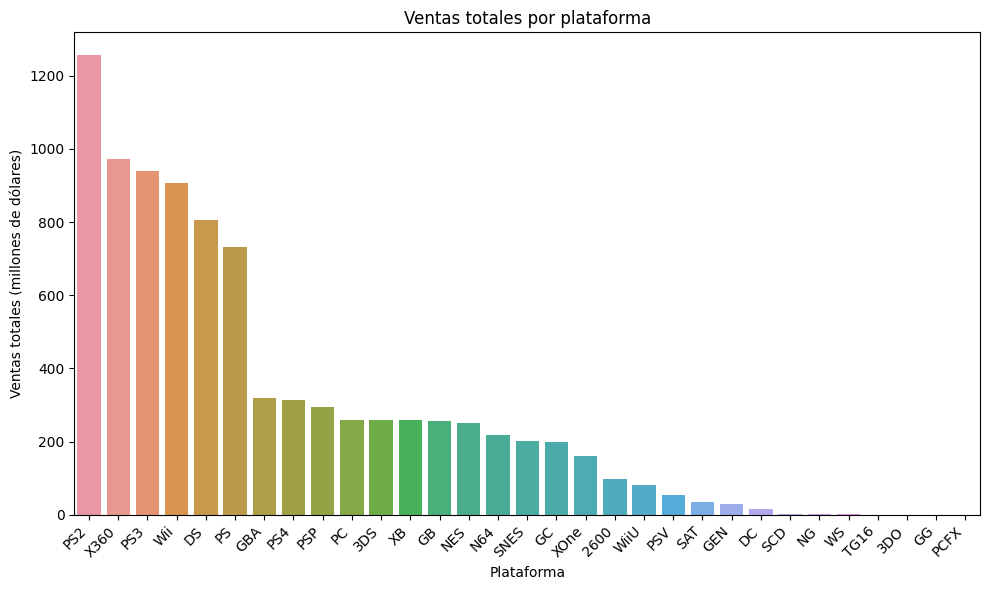

In [32]:
# Gráfica de ventas totales por cada plataforma

plt.figure(figsize=(10, 6))

sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [33]:
# Plataformas con mayores ventas totales por año

top_15_platform = platform_sales.head(15).index.tolist()

top_platform = games[games['platform'].isin(top_15_platform)]

top_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,71.0,7.5,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,71.0,7.5,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,71.0,7.5,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.0,7.5,NaN,0.01


In [34]:
# Dataframe donde se muestran las ventas totales por años para 15 principales plataformas

platform_sales_year = top_platform.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform_sales_year

platform,3DS,DS,GB,GBA,N64,NES,PC,PS,PS2,PS3,PS4,PSP,Wii,X360,XB
year_of_release,,,,,,,,,,,,,,,
1983.0,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,NaN,0.02,NaN,NaN,NaN,53.44,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986.0,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987.0,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,NaN,NaN,1.43,NaN,NaN,45.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989.0,NaN,NaN,64.97,NaN,NaN,7.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990.0,NaN,NaN,4.89,NaN,NaN,15.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991.0,NaN,NaN,5.57,NaN,NaN,6.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 2000x1200 with 0 Axes>

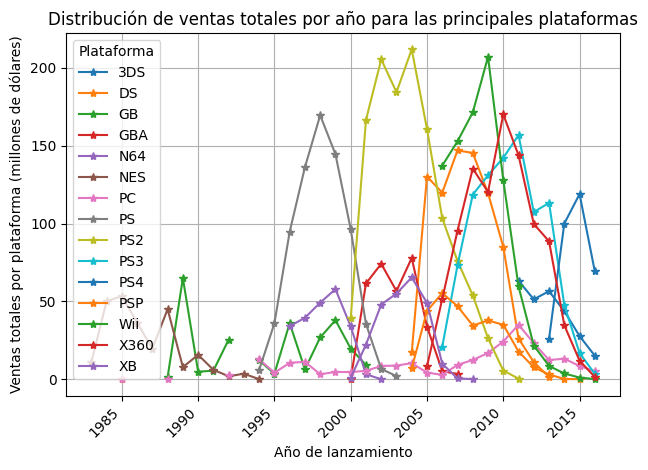

In [35]:
# Grafica de la distribución de las ventas totales por año para las principales 15 plataformas 

plt.figure(figsize=(20, 12))

platform_sales_year.plot(kind='line', marker='*')

plt.title('Distribución de ventas totales por año para las principales plataformas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales por plataforma (millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Plataforma')

plt.show()


In [36]:
# Definí como año de referencia el año presente, 2016

# Encontrar las plataformas que fueron populares antes del 20216 y las que tiene ventas en el año 2016

# Filtrar para analisis sólo los años que tienen información y dejar a un lado los años con 'unknown'
años_conocidos = games[games['year_of_release'] != 'unknown']


# Calcular las ventas totales por plataforma antes del año presente
ventas_pasado = años_conocidos[años_conocidos['year_of_release'] < 2016].groupby('platform')['total_sales'].sum().sort_values(ascending=False)


# Calcular las ventas totales por plataforma en el año presente
ventas_presente = años_conocidos[años_conocidos['year_of_release'] == 2016].groupby('platform')['total_sales'].sum().sort_values(ascending=False)


print('Plataformas más populares que tuvieron ventas en el pasado, antes del 2016:', ventas_pasado.head(10))
print()
print('Plataformas que tuvieron ventas en el presente, año 2016:', ventas_presente)

Plataformas más populares que tuvieron ventas en el pasado, antes del 2016: platform
PS2     1233.56
X360     959.72
PS3      927.74
Wii      891.00
DS       802.78
PS       727.58
GBA      312.88
PSP      289.53
GB       254.43
XB       251.57
Name: total_sales, dtype: float64

Plataformas que tuvieron ventas en el presente, año 2016: platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64


In [37]:
# Filtrar para analisis sólo los años que tienen información y dejar a un lado los años con 'unknown'

años_conocidos = games[games['year_of_release'] != 'unknown']

aparecer_desaparecer_plataformas = años_conocidos.groupby('platform')['year_of_release'].agg(['min', 'max'])

aparecer_desaparecer_plataformas.rename(columns={'min': 'año_aparicion', 'max': 'año_desaparicion'}, inplace=True)

aparecer_desaparecer_plataformas


,año_aparicion,año_desaparicion
platform,,
2600,1980.0,1989.0
3DO,1994.0,1995.0
3DS,2011.0,2016.0
DC,1998.0,2008.0
DS,1985.0,2013.0
GB,1988.0,2001.0
GBA,2000.0,2007.0
GC,2001.0,2007.0
GEN,1990.0,1994.0


In [38]:
# Encontrar los años de duración de cada plataforma

aparecer_desaparecer_plataformas['duracion'] = aparecer_desaparecer_plataformas['año_desaparicion'] - aparecer_desaparecer_plataformas['año_aparicion']

aparecer_desaparecer_plataformas.sort_values(by='año_desaparicion', inplace=True)

aparecer_desaparecer_plataformas

,año_aparicion,año_desaparicion,duracion
platform,,,
2600,1980.0,1989.0,9.0
GG,1992.0,1992.0,0.0
SCD,1993.0,1994.0,1.0
GEN,1990.0,1994.0,4.0
NES,1983.0,1994.0,11.0
3DO,1994.0,1995.0,1.0
TG16,1995.0,1995.0,0.0
NG,1993.0,1996.0,3.0
PCFX,1996.0,1996.0,0.0


<div class="alert alert-block alert-success">
<b>Celdas [30–38]</b> <a class="tocSkip"></a><br>
El análisis temporal de ventas y aparición/desaparición de plataformas es uno de los puntos fuertes del proyecto. Se muestra una evolución clara del mercado y se toman decisiones fundadas para definir el periodo de análisis posterior. El uso de tablas pivot y gráficos mejora mucho la comprensión.
</div>


De acuerdo a la información obtenida en la tabla 'aparecer_desaparecer_plataformas', se puede observar que para las plataformas que ya no presentan ventas al año presente y que se tomó como referencia, 2016, fueron lanzadas entre los años 80 y 90, permaneciendo algunas hasta cerca del año 2000. 

Algunas como las plataformas GG, TG16 o PCFX duraron algunos meses, otras plataformas duraron entre 1 y 5 años como SCD, 3DO,WS, NG, GEN, SAT. Algunas plataformas presentaron ventas durante más tiempo entre 6 y 13 años como N64, GBA, XB, 2600, SNES, PS, DC, NES, PS2, GB. Una plataforma que fue lanzada ya en los 2000 y duró vigente en ventas por 11 años fue PSP, mientras que la plataforma DS lanzada en 1985, presentando ventas hasta el 2013 estuvo vigente entre los usuarios por cerca de 28 años, durar tanto en la industria demuestra el gran éxito que tuvo por más de dos décadas. 

Ahora, analizando las plataformas que hasta el año 2016 presentan ventas, son 9 plataformas. Se observa en la tabla  que una de ellas PC ha estado vigente por más de 30 años. Las otras plataformas fueron lanzadas entre el año 2005 y 2015, presentando una permanencia en el mercado entre 3 y 11 años estas plataformas son PS3, PS4, PSV, 3SD, Wii, WiiU, X360 Y XOne.

### Período para tomar los datos

In [39]:
# Determinar el periodo en que debo tomar los datos para construir un modelo para el 2017

Despúes de analizar los datos de las ventas por cada plataforma de los últimos 36 años, con base en los datos de 1980 hasta el 2016 y de encontrar las plataformas que en los últimos años reportan ventas, así como las que ya no tienen valores de ventas, me voy a concentrar en los resultados obtenidos en la tabla, 'games_years' donde muestra la cantidad de juegos publicados por año, la tabla 'Plataformas que tuvieron ventas en el presente, año 2016' y en el dataframe 'aparecer_desaparecer_plataformas', donde muestra los años de lanzamiento de cada plataforma y los años en que desaprecieron, (dejaron de reportar ventas).

De la información de la tabla 'games_years', se puede observar que en los años de la década del 2010 en adelante, los juegos lanzados por años han ido encontrando una estabilidad que ronda entre los 500 y 650 juegos publicados por año.

Se puede observar en la tabla donde se muestran las ventas de las plataformas para el año 2016, las plataformas que están dominando el mercado son PS4, XOne, 3SD, PC, WiiU, PSV, PS3, X360, Wii. Esto se puede verificar con la tabla aparecer_desaparecer_plataformas donde se muestran los años de lanzamiento (aparición) y desaparición de las diferentes plataformas. Se observa que la mayoría de las plataformas vigentes para el año 2016 fueron lanzadas en la década de los 2010, a excepción de la plataforma PC que ha permanecido vigente en el mercado desde 1985. En la siguiente relación muestro las plataformas vigentes en el 2016, las ventas totales, el año de lanzamiento y los años que lleva de vigencia.

- PS4 (69.25, 2013, 3)
- WOne (26.15, 2013, 3)
- 3SD (15.14, 2011, 5)
- PC (5.25, 1985, 31)
- WiiU (4.60, 2012, 4)
- PSV (4.25, 2011, 5)
- PS3 (3.60, 2006, 10)
- X360 (1.52, 2005, 11)
- Wii (0.18, 2006, 10)

Por lo anterior, concluyo que los datos que debo tener en cuenta para construir un modelo para el 2017, serían los datos del año 2011 en adelante debido a que desde ese año han lanzado las plataformas que al presente año 2016 han mostrado mayores ventas como son las plataformas 3SD, PSV, PS4, WOne. Considero prudente también incluir en el análisis la plataforma PC ya que es la cuarta plataforma que presenta más ventas en el 2016 pese a haber sido lanzada en el año 1985.


### Dataframe de datos relevantes

In [40]:
# Filtrar el DataFrame para incluir solo los datos del año 2011 en adelante

datos_analisis = games[games['year_of_release'] >= 2011]

datos_analisis.reset_index(drop=True, inplace=True)

datos_analisis


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,NaN,14.63
4,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,71.0,7.5,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN,0.01
4018,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,71.0,7.5,NaN,0.01
4019,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,71.0,7.5,NaN,0.01
4020,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN,0.01


In [41]:
datos_analisis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4022 entries, 0 to 4021
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   float64
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   critic_score     4022 non-null   float64
 9   user_score       4022 non-null   float64
 10  rating           2314 non-null   object 
 11  total_sales      4022 non-null   float64
dtypes: float64(8), object(4)
memory usage: 377.2+ KB


Con este nuevo DataFrame 'datos_analisis' donde sólo trabajaré con los datos del 2011 en adelante, obtengo 4022 filas de las 16715 del DataFrame original 'games'. La única columna que presenta valores ausentes es 'rating', pero como lo justifiqué anteriormente, decidí dejarla así debido a que las clasificaciones ESRB es realizado con base a edades de los usuarios y contenidos de los juegos, por lo tanto considero que lo más adecuado es dejar esta columna con los valores NaN presentes y cuando deba realizar el análisis de esta, trabajar con los valores de la clasificación que están presente.

### Comportamiento de las plataformas con base en los datos relevantes

#### Plataformas líderes en ventas

In [42]:
# Calcular las ventas totales por plataforma

ventas_totales_analisis = datos_analisis.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

ventas_totales_analisis



platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: total_sales, dtype: float64

In [43]:
ventas_anuales_analisis = datos_analisis.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

ventas_anuales_analisis

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011.0,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012.0,51.36,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013.0,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<Figure size 2000x1200 with 0 Axes>

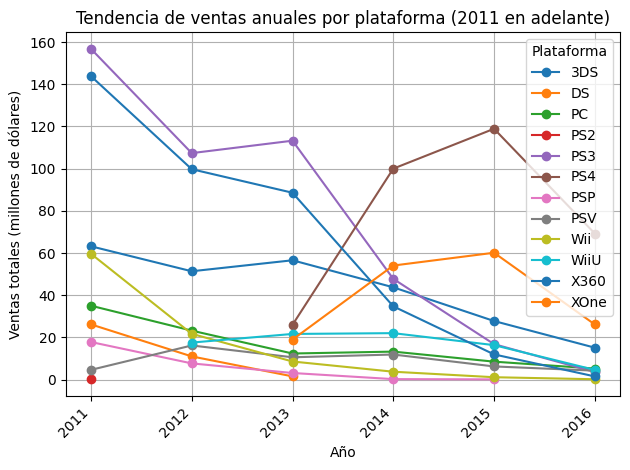

In [44]:
# Graficar directamente todas las columnas (plataformas) contra el índice (años)

plt.figure(figsize=(20, 12))

ventas_anuales_analisis.plot(kind='line', marker='o')

plt.title('Tendencia de ventas anuales por plataforma (2011 en adelante)')
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones de dólares)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



En la tabla 'ventas_anuales_analisis' se puede observar que se presentan varios valores NaN, esto significa que algunas plataformas no reportan venta porque son platafromas que desaparecieron o que por el contrario, son plataformas que apenas fueron lanzadas los últimos años.

Por lo tanto, en la gráfica 'Tendencia de ventas anuales por plataforma', se pueden ver líneas que no inician en el año 2011 o que no finalizan en el año 2016. En la gráfica también se puede observar que para el año 2016 todas las plataformas disminuye en ventas, esto puede deberse a que los datos del año 2016 no están completos. Sin embargo, se puede notar que las plataformas que presentan mayores ventas en los últimos 3 años (2014, 2015, 2016) son PS4, XOne, 3SD.

Claramente en esta misma gráfica se puede notar que otras plaformas reducen sus ventas en estos últimos tres años como PS3, Wii y X360.

In [45]:
# Elegir plataformas altamente rentables

In [46]:
# Encontrar las ventas de los últimos tres años para determinar las plataformas altamente rentables

# Ventas totales por plataforma en 2014
ventas_2014 = datos_analisis[datos_analisis['year_of_release'] == 2014].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print('\nVentas totales por plataforma en 2014:')
print(ventas_2014)

# Ventas totales por plataforma en 2015
ventas_2015 = datos_analisis[datos_analisis['year_of_release'] == 2015].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print('\nVentas totales por plataforma en 2015:')
print(ventas_2015)

# Ventas totales por plataforma en 2016
ventas_2016 = datos_analisis[datos_analisis['year_of_release'] == 2016].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print('\nVentas totales por plataforma en 2016:')
print(ventas_2016)



Ventas totales por plataforma en 2014:
platform
PS4     100.00
XOne     54.07
PS3      47.76
3DS      43.76
X360     34.74
WiiU     22.03
PC       13.28
PSV      11.90
Wii       3.75
PSP       0.24
Name: total_sales, dtype: float64

Ventas totales por plataforma en 2015:
platform
PS4     118.90
XOne     60.14
3DS      27.78
PS3      16.82
WiiU     16.35
X360     11.96
PC        8.52
PSV       6.25
Wii       1.14
PSP       0.12
Name: total_sales, dtype: float64

Ventas totales por plataforma en 2016:
platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64


Después de revisar las ventas de los últimos tres años y consideran que para el año 2016 la información no se encuentra completa, puedo concluir que las plataformas potencialmente rentables para el modelo a construir para el 2017 con base en las ventas de los últimos tres años son PS4 (2013), XOne (2013) y 3SD (2011) porque presentan las ventas más altas.

Este analisis se puede verificar con la gráfica anterior donde se muestran las tres plataformas que para los datos con los que se cuentan en el 2016, son las que hasta el momento presentan mayores ventas, por lo tanto son las que se pueden estimar como las plataformas potencialmente rentables para el año 2017.

### Diagrama de caja para analizar las ventas globales

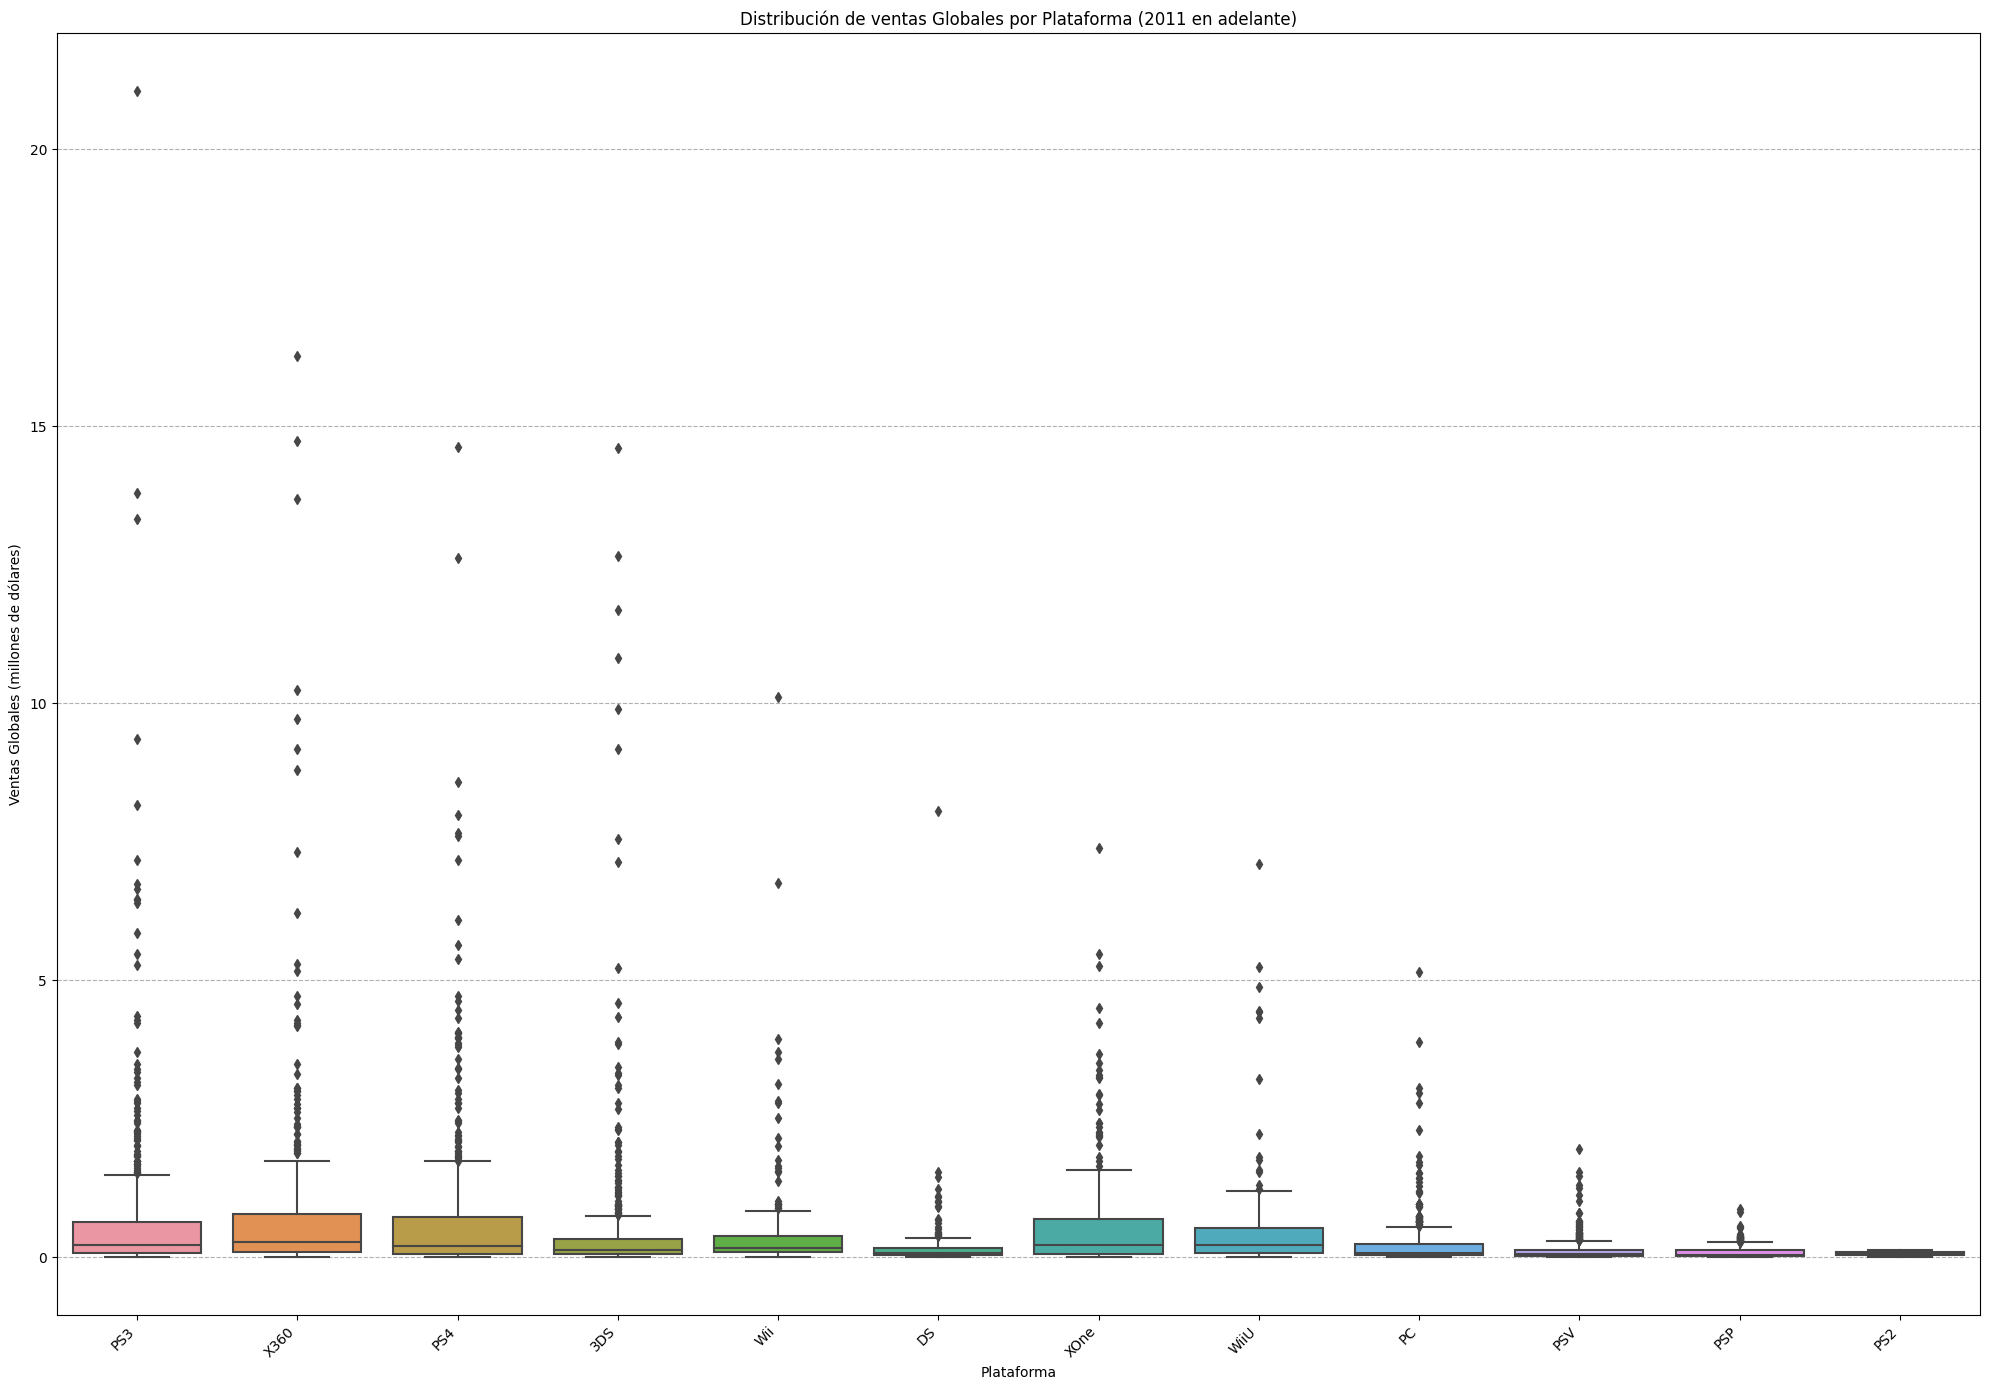

In [47]:
# Gráfica de diagrama de caja para ventas globales por pataforma desde el año 2011

plt.figure(figsize=(20, 14))

sns.boxplot(x='platform', y='total_sales', data=datos_analisis)
plt.title('Distribución de ventas Globales por Plataforma (2011 en adelante)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [42–47]</b> <a class="tocSkip"></a><br>
Muy buen uso del boxplot para analizar la dispersión de ventas. Se acompaña con una interpretación estadística valiosa que destaca la presencia de datos atípicos y el sesgo hacia la derecha. El análisis es minucioso y demuestra solidez conceptual.
</div>


En el diagrama de cajas se presentan las plataformas que presentaron ventas desde el año 2011, año desde el cual consideré había información representativa para construir el modelo del próximo 2017.

De acuerdo al diagrama de cajas, para las plataformas DS, PC, PSV, PSP y PS2 las ventas a partir del 2011 fueron muy pocas, incluso algunas de estas plataformas dejaron de reportar ventas. Todas estas plataformas a excepción de PS2, presentaron datos atípicos, aunque en comparación a las otras plataformas de este diagrama los valores de esos datos son pequeños.

Observando las plataformas 3SD, Wii y WiiU, presentan ventas un poco similares. La dispersión de las ventas para WiiU se muestra ligeramente mayor a las otras plataformas. Sin embargo, la plataforma 3SD presenta muchos más valores atípos con respecto a Wii y WiiU. Las medianas de estas plataformas se observan cercanas al cuartil 1. 
El estar la mediana sesgada hacia la parte inferir de la caja y la anotación de muchos valores atípicos en la parte superior, especialmente para la plataforma 3SD, esto sugiere una distribución sesgada a la derecha, donde la media podría ser mayor a la mediana.

En la gráfica se puede ver las otras plataformas PS3, X360, PS4, XOne con una cantidad importante de ventas, así como una mediana sesgada hacia la parte inferior de la caja mostrando gran dispersión de datos, presentando mayor cantidad de datos atípicos las plataformas PS3, X360 y PS4. En estes casos, también se puede sugerir una dispersión sesgada a la derecha, donde la media en estas cuatro plataformas, podría ser mayor a la mediana.

In [48]:
# Encontrar las descripción estadística para el DataFrame ventas_anuales_analisis

ventas_anuales_analisis.describe()

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,6.000000,3.000000,6.000000,1.00,6.000000,4.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000
mean,42.968333,12.910000,16.280000,0.45,74.261667,78.535000,5.802000,8.968333,15.836667,16.438000,63.396667,39.830000
std,18.278261,12.429397,11.007403,NaN,60.695667,40.567917,7.387558,4.729695,22.864073,7.068244,56.074638,20.313977
min,15.140000,1.540000,5.250000,0.45,3.600000,25.990000,0.120000,4.250000,0.180000,4.600000,1.520000,18.960000
25%,31.775000,6.275000,9.485000,0.45,24.555000,58.435000,0.240000,5.035000,1.792500,16.350000,17.655000,24.352500
50%,47.560000,11.010000,12.830000,0.45,77.560000,84.625000,3.140000,8.420000,6.170000,17.560000,61.660000,40.110000
75%,55.267500,18.595000,20.735000,0.45,111.777500,104.725000,7.690000,11.572500,18.430000,21.650000,96.950000,55.587500
max,63.200000,26.180000,35.030000,0.45,156.780000,118.900000,17.820000,16.190000,59.650000,22.030000,143.840000,60.140000


Las ventas promedio de la mayoría de estas plataformas analizadas con los valores de la desviación estandar demuestra claramente la dispersion de datos y la presencia de datos atípicos en la mayoría de las plataformas analizadas del año 2011 en adelante. Esto podría deberse a que los usuarios se pueden interesar más por unos tipos de juegos más que por otros fluctuando así las ventas entre plataformas y generos de juegos.


### Analisis de las reseñas de los usuarios y críticos profesionales a una plataforma

In [49]:
# Filtar el DataFrame 'datos_analisis' para filtrar por la plataforma seleccionada

# Plataforma seleccionada: PS4

ps4_datos = datos_analisis[datos_analisis['platform'] == 'PS4']

ps4_datos

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,NaN,14.63
9,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
20,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
23,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,71.0,7.5,NaN,7.98
24,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
3924,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
3927,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN,0.01
3936,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
3937,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [50]:
# DataFrame para la gráfica de dispersión de la calificación de usuarios vs ventas totales plataforma PS4

ps4_datos_user_score = ps4_datos.pivot_table(index='user_score', columns='year_of_release', values='total_sales', aggfunc='sum')

ps4_datos_user_score

year_of_release,2013.0,2014.0,2015.0,2016.0
user_score,,,,
1.5,NaN,NaN,0.20,NaN
1.9,NaN,NaN,0.06,NaN
2.0,0.22,NaN,NaN,0.01
2.3,NaN,NaN,NaN,0.01
2.7,0.24,NaN,NaN,NaN
2.9,0.16,NaN,NaN,NaN
3.0,NaN,NaN,0.06,NaN
3.3,NaN,NaN,0.30,NaN
3.4,NaN,NaN,0.12,5.37


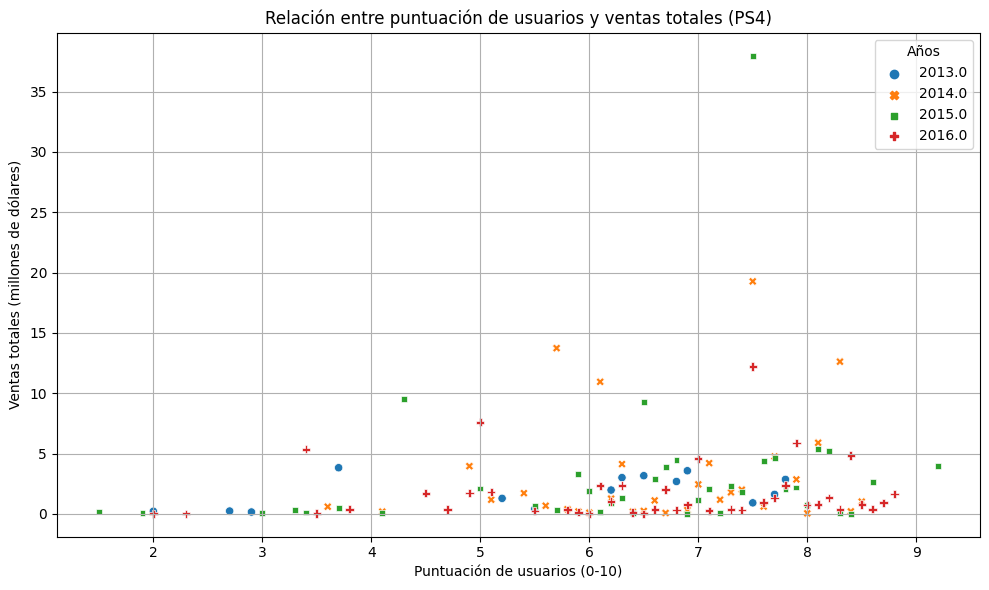

In [51]:
# Gráfico de dispersión de user_score vs total_sales plataforma PS4

plt.figure(figsize=(10, 6))

sns.scatterplot(data=ps4_datos_user_score)
plt.title('Relación entre puntuación de usuarios y ventas totales (PS4)')
plt.xlabel('Puntuación de usuarios (0-10)')
plt.ylabel('Ventas totales (millones de dólares)')
plt.legend(title='Años')
plt.grid(True)
plt.tight_layout()

plt.show()

In [52]:
# Cálculo de la correlación de la calificación de usuarios vs las ventas totales plataforma PS4

user_score_correlacion = ps4_datos['user_score'].corr(ps4_datos['total_sales'])

user_score_correlacion

-0.06275557891282788

In [53]:
# DataFrame para la gráfica de dispersión de la calificación de criticos vs ventas totales plataforma PS4

ps4_datos_critic_score = ps4_datos.pivot_table(index='critic_score', columns='year_of_release', values='total_sales', aggfunc='sum')

ps4_datos_critic_score

year_of_release,2013.0,2014.0,2015.0,2016.0
critic_score,,,,
19.0,NaN,NaN,0.12,NaN
25.0,NaN,NaN,0.06,NaN
31.0,NaN,NaN,NaN,0.02
32.0,NaN,NaN,0.20,NaN
38.0,0.16,NaN,NaN,NaN
42.0,NaN,NaN,0.06,0.01
43.0,0.24,NaN,NaN,0.05
44.0,NaN,NaN,NaN,0.09
45.0,NaN,NaN,NaN,0.14


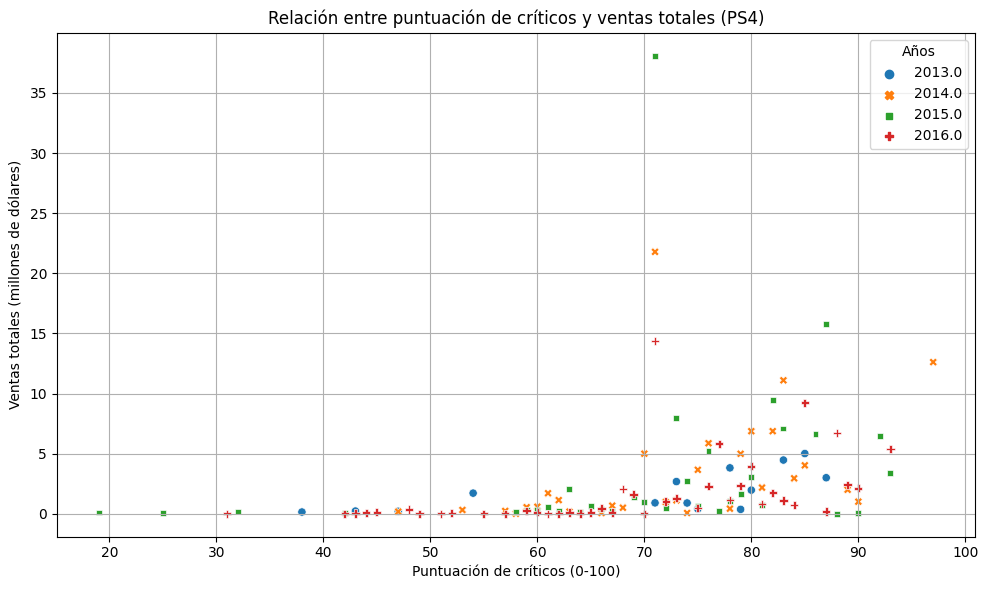

In [54]:
# Gráfico de dispersión de critic_score vs total_sales plataforma PS4

plt.figure(figsize=(10, 6))

sns.scatterplot(data=ps4_datos_critic_score)
plt.title('Relación entre puntuación de críticos y ventas totales (PS4)')
plt.xlabel('Puntuación de críticos (0-100)')
plt.ylabel('Ventas totales (millones de dólares)')
plt.legend(title='Años')
plt.grid(True)
plt.tight_layout()

plt.show()

In [55]:
# Cálculo de la correlación de la calificación de críticos vs las ventas totales plataforma PS4

critic_score_correlacion = ps4_datos['critic_score'].corr(ps4_datos['total_sales'])

critic_score_correlacion


0.3387064530024634

<div class="alert alert-block alert-success">
<b>Celdas [49–55]</b> <a class="tocSkip"></a><br>
Excelente análisis de correlación entre calificaciones (usuarios y críticos) y ventas. Se combinan gráficas claras con interpretación cuantitativa mediante coeficientes de correlación. Se demuestra comprensión sobre cómo estas variables pueden influir en las decisiones de compra.
</div>


Analizando las dos gráficas de dispersión para la plataforma PS4 lanzada en el año 2013, para la calificación de los usuarios entre los rangos de 0-10 y la calificación de los críticos entre los rangos de 0-100,
se observa en la gráfica de los usuarios que la mayor concentración de calificaciones se da en el rango entre 6 y 8, mientras que en la gráfica de los críticos la mayor concentración de calificaciones se da entre los rangos 70 y 90. 

En ambas gráficas que observa que para el año 2014 se presentan las mayores ventas para esta plataforma PS4, correspondiendo también a la concentración de calificaciones tanto para usuarios como para críticos.

En ambas gráficas también se puede notar un valor atípico en las ventas para el año 2015, en donde la calificación de los usuarios es de 7.5 mientras que para los críticos es de aproximadamente 72.

De ambas gráficas puedo concluir que las ventas tienden a aumentar entre mejor son las reseñas tanto de usuarios como de los críticos.

En cuanto a las corralaciones puedo concluir:
- La correlación de las calificaciones de los usuarios con respecto a las ventas, fue negativa. Entiendo que los usuarios pudieron dar una calificación ligeramente menor que la de los críticos y al dar evaluaciones más bajas pueden afectar las ventas. Esto puede explicar la correlación negativa.

- Lo correlación de las calificaciones de los críticos con respecto a las ventas, fue positiva. Aunque el valor no es tan cercano a 1, se puede decir que al ser positiva puede indicar que a una mayor puntuación de los críticos, se pueden tener mayores ventas.

### Comparación de ventas de los mismos juegos en varias plataformas

In [56]:
# Contar la frecuencia de los juegos del DataFrame datos_analisis

conteo_juegos = datos_analisis['name'].value_counts()

juegos_multiplataforma = conteo_juegos[conteo_juegos > 1].index.tolist()

juegos_multiplataforma

['LEGO Marvel Super Heroes',
 'FIFA 14',
 'Lego Batman 3: Beyond Gotham',
 'The LEGO Movie Videogame',
 'Terraria',
 'FIFA Soccer 13',
 'FIFA 15',
 'LEGO Jurassic World',
 'LEGO The Hobbit',
 'Angry Birds Star Wars',
 'LEGO Batman 2: DC Super Heroes',
 'LEGO Star Wars III: The Clone Wars',
 'Major League Baseball 2K11',
 'LEGO The Lord of the Rings',
 'Skylanders: Trap Team',
 "LEGO Marvel's Avengers",
 'FIFA 12',
 'LEGO Pirates of the Caribbean: The Video Game',
 'Pro Evolution Soccer 2012',
 'Skylanders SWAP Force',
 'The Amazing Spider-Man 2 (2014)',
 'Lego Star Wars: The Force Awakens',
 'Skylanders: SuperChargers',
 'Just Dance 2017',
 'Madden NFL 13',
 'Disney Infinity',
 'Rayman Origins',
 'Ben 10 Galactic Racing',
 'Darksiders II',
 "Assassin's Creed IV: Black Flag",
 'Rugby World Cup 2015',
 'The Walking Dead: Season One',
 'Major League Baseball 2K12',
 'Turbo: Super Stunt Squad',
 'Adventure Time: Finn & Jake Investigations',
 'Just Dance 2016',
 'The Amazing Spider-Man (Con

In [57]:
# Filtrar el DataFrame datos_analisis para incluir solo los juegos multiplataforma, luego agrupar por 
# nombre de juego, plataforma y sumar las ventas

multiplataforma = datos_analisis[datos_analisis['name'].isin(juegos_multiplataforma)].copy()

comparativo_ventas = multiplataforma.groupby(['name', 'platform'])['total_sales'].sum().unstack()

comparativo_ventas.sample(15)


platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,,
Naruto Shippuden: Ultimate Ninja Storm Revolution,NaN,NaN,NaN,NaN,0.44,NaN,NaN,NaN,NaN,NaN,0.22,NaN
Singstar: Ultimate Party,NaN,NaN,NaN,NaN,0.09,0.19,NaN,NaN,NaN,NaN,NaN,NaN
Generator Rex: Agent of Providence,0.10,0.07,NaN,NaN,0.07,NaN,NaN,NaN,0.08,NaN,0.06,NaN
UFC Personal Trainer: The Ultimate Fitness System,NaN,NaN,NaN,NaN,0.19,NaN,NaN,NaN,0.19,NaN,0.77,NaN
Mario vs. Donkey Kong: Tipping Stars,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN
Escape Dead Island,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN,NaN,0.08,NaN
God Eater Resurrection,NaN,NaN,NaN,NaN,NaN,0.08,NaN,0.19,NaN,NaN,NaN,NaN
WWE All Stars,0.23,NaN,NaN,0.1,0.41,NaN,0.19,NaN,0.19,NaN,0.35,NaN
Sniper Elite 3,NaN,NaN,NaN,NaN,0.28,0.69,NaN,NaN,NaN,NaN,0.31,0.34


In [58]:
comparativo_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 796 entries,  Frozen: Olaf's Quest to uDraw Studio: Instant Artist
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3DS     119 non-null    float64
 1   DS      55 non-null     float64
 2   PC      232 non-null    float64
 3   PS2     6 non-null      float64
 4   PS3     540 non-null    float64
 5   PS4     316 non-null    float64
 6   PSP     66 non-null     float64
 7   PSV     188 non-null    float64
 8   Wii     133 non-null    float64
 9   WiiU    99 non-null     float64
 10  X360    421 non-null    float64
 11  XOne    224 non-null    float64
dtypes: float64(12)
memory usage: 80.8+ KB


<div class="alert alert-block alert-success">
<b>Celdas [56–58]</b> <a class="tocSkip"></a><br>
Muy buena estrategia para identificar juegos multiplataforma. Se hace un análisis claro agrupando por nombre y plataforma, lo cual permite evaluar comparativamente su rendimiento en distintas consolas. También es positiva la reflexión sobre cómo estas diferencias pueden deberse a la penetración de mercado o popularidad de las plataformas.
</div>


Realizando el análisis de info ( ) del DataFrame comparativo_ventas, donde se compara las ventas de cada juego que está presente en varias plataformas, se obtienen 796 entradas. Posiblemente son 796 juegos que están en más de 1 plataforma de video juegos. Se puede ver en los datos obtenidos, que las plataformas que más juegos multiplataformas contiene son PS3 (540), X360 (412), PS4 (316), PC (232), XOne (224). Cabe anotar que los valores ausentes de este DataFrame indica que no todos los juegos están presentes en todas las plataformas. Algunas plataformas presentan muy pocos juegos como la PS2 o DS, esto puede indicar que son plataformas que tienen pocas ventas y que tienden a desaparecer. 

Ahora bien, observando el DataFrame comparativo_ventas, se encuentra que en casi todos los juegos que están presentes en más de 1 plataforma, los precios de las ventas varían entre plataformas. Corriendo el código varias veces observe que en la mayoría de las veces, las ventas de los juegos son un poco mayor en unas plataformas que en otras, y en pocas ocasiones tienen el mismo valor. Por lo que noté, es más frecuente que el valor de las ventas sean mayor en plataformas que tienen más juegos como en la plataforma PS3 o X360.


### Analisis de los generos de los videojuegos

In [59]:
# Cálculo de la cantidad de cada genero de juegos del DataFrame 'datos_analisis'

cantidad_generos = datos_analisis['genre'].value_counts()

cantidad_generos

Action          1269
Role-Playing     465
Adventure        410
Sports           389
Misc             375
Shooter          329
Racing           180
Fighting         159
Simulation       136
Platform         122
Strategy         117
Puzzle            71
Name: genre, dtype: int64

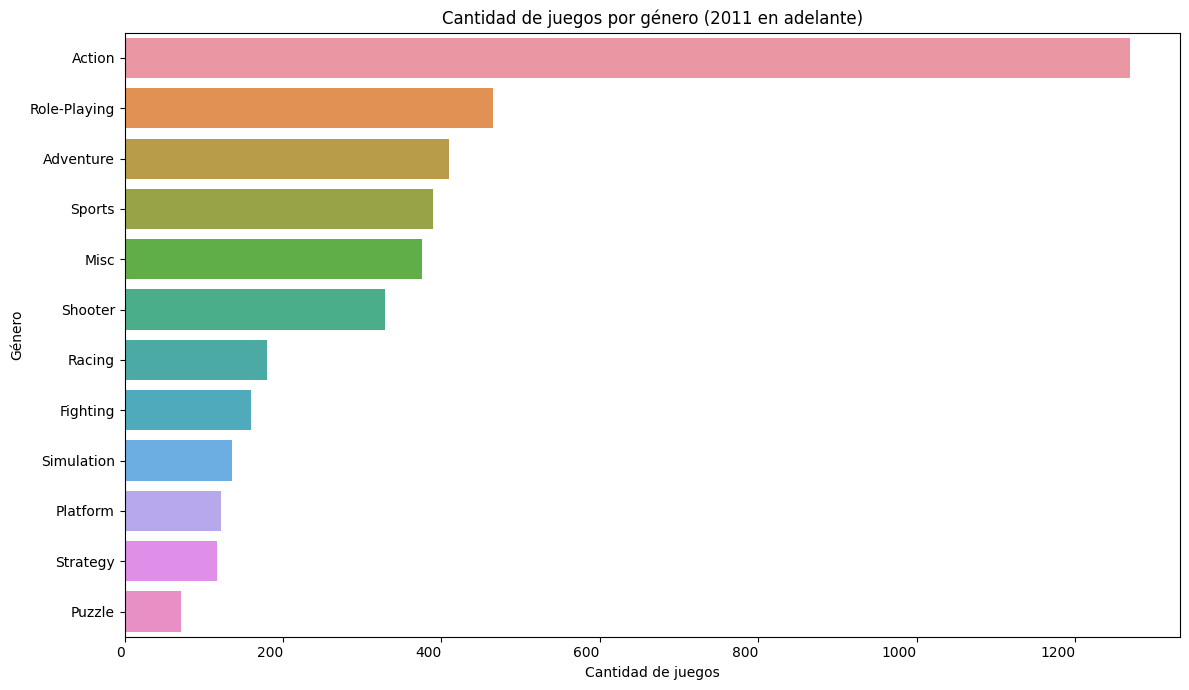

In [60]:
# Gráfico de barras horizontales para mostrar la cantidad de juegos por cada género

plt.figure(figsize=(12, 7))

sns.barplot(x=cantidad_generos.values, y=cantidad_generos.index, order=cantidad_generos.index)
plt.title('Cantidad de juegos por género (2011 en adelante)')
plt.xlabel('Cantidad de juegos')
plt.ylabel('Género')
plt.xticks(ha='right')
plt.tight_layout()

plt.show()

De acuerdo a la gráfica de barras horizontales, los géneros que tienen mayor cantidad de juegos son los acción que prácticamente triplica a los otros generos que le siguen como juegos de rol, aventura y deportes. En la gráfica se muestra que los géneros que tienen menos cantidad de juegos son los de estrategia y los puzzle.

In [61]:
# Comparación de géneros de video juegos y ventas

generos_ventas = datos_analisis.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

generos_ventas

genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Platform         88.68
Racing           88.31
Fighting         66.90
Simulation       50.26
Adventure        45.04
Strategy         22.16
Puzzle            9.85
Name: total_sales, dtype: float64

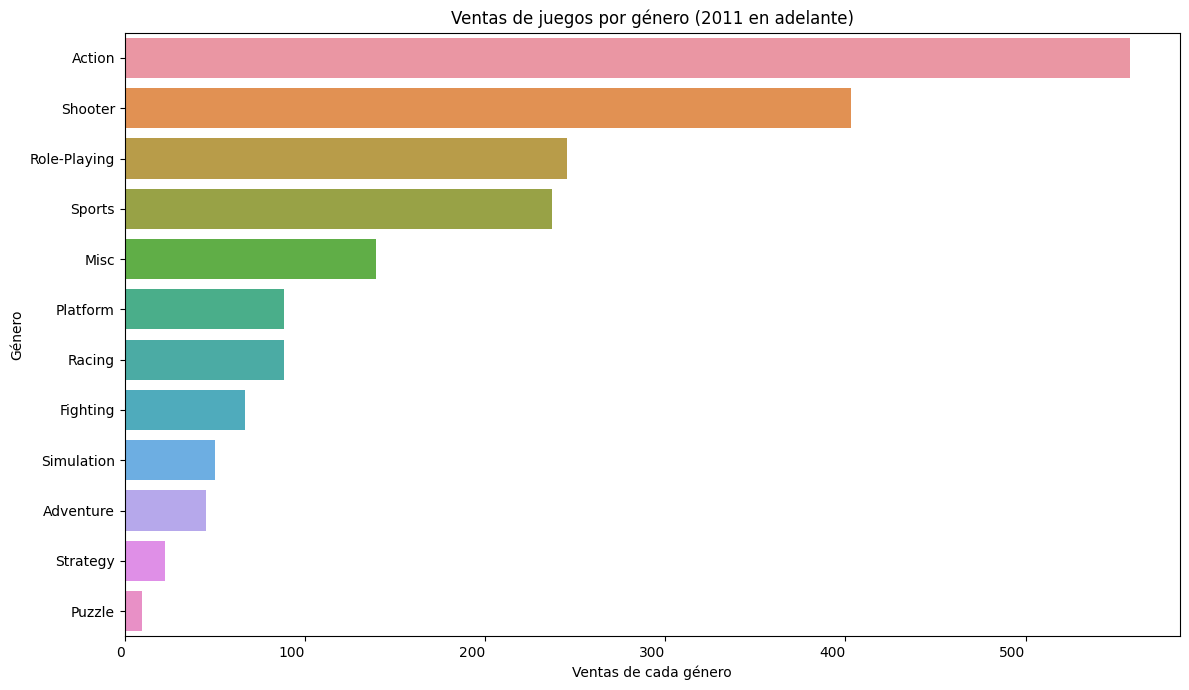

In [62]:
# Gráfico de barras horizontales para mostrar las ventas totales por cada género

plt.figure(figsize=(12, 7))

sns.barplot(x=generos_ventas.values, y=generos_ventas.index, order=generos_ventas.index)
plt.title('Ventas de juegos por género (2011 en adelante)')
plt.xlabel('Ventas de cada género')
plt.ylabel('Género')
plt.xticks(ha='right')
plt.tight_layout()

plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [59–62]</b> <a class="tocSkip"></a><br>
El análisis por género está bien fundamentado. Las visualizaciones son claras y las conclusiones que comparan cantidad de títulos con volumen de ventas aportan valor. Es acertada la observación de que algunos géneros pueden ser muy rentables pese a no tener tantos lanzamientos, como es el caso de los shooters.
</div>


Analizando la gráfica de 'Ventas de juegos por género' se observa que los juegos que presentan ventas más altas son los juegos de acción, seguido por los juegos de tiros 'shooter', juegos de rol y de deportes. Los géneros que presentan menos ventas son los juegos de aventura, estrategia y los puzzle.

Ahora, comparando la gráfica de 'Cantidad de juegos por género' y la de 'Ventas de juegos por género' se encuentra que en el caso de los juegos con más cantidad de juegos y los de mayores ventas, en primer lugar está los del género de acción. El género que está en segundo lugar en ventas es 'shooter', pero este juego está en quinto lugar en cantidad de juegos, lo que puede indicar que son juegos muy atractivos para los usuarios y de un mayor costo en comparación a juegos de otros géneros. 

Por otra parte, aunque los juegos de aventura ocupan el tercer lugar en cantidad de juegos, son uno de los que menos ventas tiene, pudiendo indicar que es un género que ha perdido interés entre los usuarios. Tanto en la gráfica de 'Cantidad de juegos por género' y la de 'Ventas de juegos por género' los géneros que se encuentra en los dos últimos lugares son los de estarategia y los puzzle reflejando que al ser pocas opciones de juegos, pudieran ser de igual forma poco interesantes para los usuarios registrando las ventas más bajas en video juegos.


## Paso 4. Crear un perfil de usuario para cada región

### Determinar las cinco plataformas principales

In [63]:
# Crear un Dataframe de ventas por regiones 

ventas_regiones = datos_analisis.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

ventas_regiones


,na_sales,eu_sales,jp_sales
platform,,,
3DS,82.65,61.27,100.62
DS,18.86,9.24,8.04
PC,29.88,56.70,0.00
PS2,0.13,0.13,0.09
PS3,168.26,163.10,49.39
PS4,108.74,141.09,15.96
PSP,2.19,1.77,24.04
PSV,12.47,13.07,21.84
Wii,48.56,29.60,8.97


In [64]:
# Mostrar las cinco plataformas principales para Norteamérica

plataformas_na_top_5 = ventas_regiones['na_sales'].sort_values(ascending=False)

plataformas_na_top_5.head(5)


platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64

In [65]:
# Mostrar las cinco plataformas principales para Europa

plataformas_eu_top_5 = ventas_regiones['eu_sales'].sort_values(ascending=False)

plataformas_eu_top_5.head(5)


platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64

In [66]:
# Mostrar las cinco plataformas principales para Japón

plataformas_jp_top_5 = ventas_regiones['jp_sales'].sort_values(ascending=False)

plataformas_jp_top_5.head(5)


platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64

In [67]:
# Cálculo de las ventas totales por región

total_ventas_na = ventas_regiones['na_sales'].sum()
print('Ventas totales para la región de Norteamérica:', total_ventas_na)

total_ventas_eu = ventas_regiones['eu_sales'].sum()
print('Ventas totales para la región de Europa:', total_ventas_eu)

total_ventas_jp = ventas_regiones['jp_sales'].sum()
print('Ventas totales para la región de Japón:', total_ventas_jp)


Ventas totales para la región de Norteamérica: 829.7600000000004
Ventas totales para la región de Europa: 669.7900000000006
Ventas totales para la región de Japón: 245.65000000000018


In [68]:
# Cálculo de la cuota de mercado de cada región

cuota_na = (ventas_regiones['na_sales'] / total_ventas_na) * 100
print('Cuota de Ventas para la región de Norteamérica:', cuota_na.sort_values(ascending=False).head(5))

print()

cuota_eu = (ventas_regiones['eu_sales'] / total_ventas_eu) * 100
print('Cuota de Ventas para la región de Europa:', cuota_eu.sort_values(ascending=False).head(5))

print()

cuota_jp = (ventas_regiones['jp_sales'] / total_ventas_jp) * 100
print('Cuota de Ventas para la región de Japón:', cuota_jp.sort_values(ascending=False).head(5))


Cuota de Ventas para la región de Norteamérica: platform
X360    27.333205
PS3     20.278153
PS4     13.104994
XOne    11.222522
3DS      9.960712
Name: na_sales, dtype: float64

Cuota de Ventas para la región de Europa: platform
PS3     24.350916
PS4     21.064811
X360    17.483092
3DS      9.147643
PC       8.465340
Name: eu_sales, dtype: float64

Cuota de Ventas para la región de Japón: platform
3DS    40.960716
PS3    20.105842
PSP     9.786281
PSV     8.890698
PS4     6.497049
Name: jp_sales, dtype: float64


<div class="alert alert-block alert-success">
<b>Celdas [63–68]</b> <a class="tocSkip"></a><br>
Excelente trabajo al identificar las plataformas líderes por región. El uso de cuota de mercado permite ir más allá del volumen absoluto y obtener una visión más estratégica. La comparación entre regiones y el análisis de diferencias culturales está muy bien logrado.
</div>


Analizando la información obtenida en los cálculos mostrados anteriormente sobre las ventas por plataforma en las regiones de Norteamérica, Europa y Japón observo lo siguiente:

1. De las plataformas principales en las tres regiones aparecen en común las plataformas PS3, PS4 y 3SD.

2. PS3 y PS4 aparecen en los 3 primeros lugares en Norteamérica y Europa, mientras que en Japón PS3 está en el segundo lugar pero PS4 aparece en el quinto puesto.

3. Mientras que Norteamérica y Europa aparte de tener en común las plataformas PS3, PS4 y 3SD, también aparece entre su top 5 X360, indicando que los intereses de los usuarios entre estas dos regiones son más parecidos en comparación a la región de Japón, ya que en el top 5 de esta región aparecen las plataformas PSP y PSV indicando que son importantes para los usuarios de esta región, pero no para las otras dos regiones.

4. En cuando a la cuota de mercado de las plataformas que tienen en común del top 5 en estas tres regiones, se puede notar que:
- PS3 presenta un 20.27% Norteamérica, 24.35% Europa, 20.20% Japón, son cuotas muy similares en las tres regiones. Cabe anotar que para la región de Europa esta plataforma PS3 es la que presenta la mayor cuota, posiblemente tiene una ligera preferencia en los usuarios de esta región.
- PS4 presenta un 13.10% Norteamérica, 21.06% Europa, 20.10% Japón, son cuotas muy similares para Europa y Japón pero no para Norteamérica presentando una cuota alrededor del 8% menos en comparación a las otras dos regiones.
- 3DS presenta 9.96% Norteamérica, 9.14% Europa, 40.96% Japón, son cuotas muy similares para Norteamérica y Europa, pero para Japón es la cuota más alta en esta plataforma indicando que es la favorita para los usuarios de esta región.
- Para la región de Norteamérica la plataforma con mayor cuota es X360 siendo de un 27.33%, indicando una posible preferencia de los usuarios por esta plataforma.

### Determinar los cinco géneros principales

In [69]:
# Crear un Dataframe de generos de juegos por regiones con base en las ventas

generos_regiones = datos_analisis.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

generos_regiones


,na_sales,eu_sales,jp_sales
genre,,,
Action,230.92,199.12,63.62
Adventure,14.76,13.96,12.07
Fighting,31.63,16.24,12.38
Misc,69.69,39.72,17.60
Platform,38.28,30.07,12.13
Puzzle,2.74,3.56,2.91
Racing,31.98,40.58,5.64
Role-Playing,83.78,62.30,79.87
Shooter,194.43,148.02,11.92


In [70]:
# Mostrar las cinco generos principales para Norteamérica

generos_na_top_5 = generos_regiones['na_sales'].sort_values(ascending=False)

generos_na_top_5.head(5)


genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64

In [71]:
# Mostrar las cinco generos principales para Europa

generos_eu_top_5 = generos_regiones['eu_sales'].sort_values(ascending=False)

generos_eu_top_5.head(5)


genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Name: eu_sales, dtype: float64

In [72]:
# Mostrar las cinco generos principales para Japón

generos_jp_top_5 = generos_regiones['jp_sales'].sort_values(ascending=False)

generos_jp_top_5.head(5)

genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64

<div class="alert alert-block alert-success">
<b>Celdas [69–72]</b> <a class="tocSkip"></a><br>
Muy acertado el análisis regional por género. Se evidencia cómo las preferencias varían de manera significativa entre mercados, especialmente entre Japón y Occidente. Este tipo de insights es crucial para adaptar campañas publicitarias por región.
</div>


De la información obtenida sobre la preferencia de los géneros en las diferentes regiones, se observa que los gustos entre los usuarios de Norteamérica y Europa son muy parecidos pues comparten los géneros de action, shooter, sport y role-playing en el mismo orden de preferencia según sus ventas.
Por otra parte para la región de Japón sus gustos varían un poco pues de estos cuatro géneros, Japón presenta en el top 5 solo los géneros role_playing como su juego preferido seguido por los juegos de action.

En las tres regiones se observa que las ventas de los géneros de juegos posicionados en los dos primeros lugares son muy superiores a los otros generos que están el top 5. Lo que indica que para la región de Norteamérica y Europa los géneros que tiene mayores ventas son action y shooter, mientras que para la región de Japón es role_playing y action.

### Determinar  la influencia de las clasificaciones ESRB en las ventas

In [73]:
# Calcular las ventas totales por clasificación ESRB en Norteamérica

ventas_esrb_na = datos_analisis.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

ventas_esrb_na

rating
M       308.45
E       170.17
E10+    117.72
T       109.31
EC        0.42
RP        0.00
Name: na_sales, dtype: float64

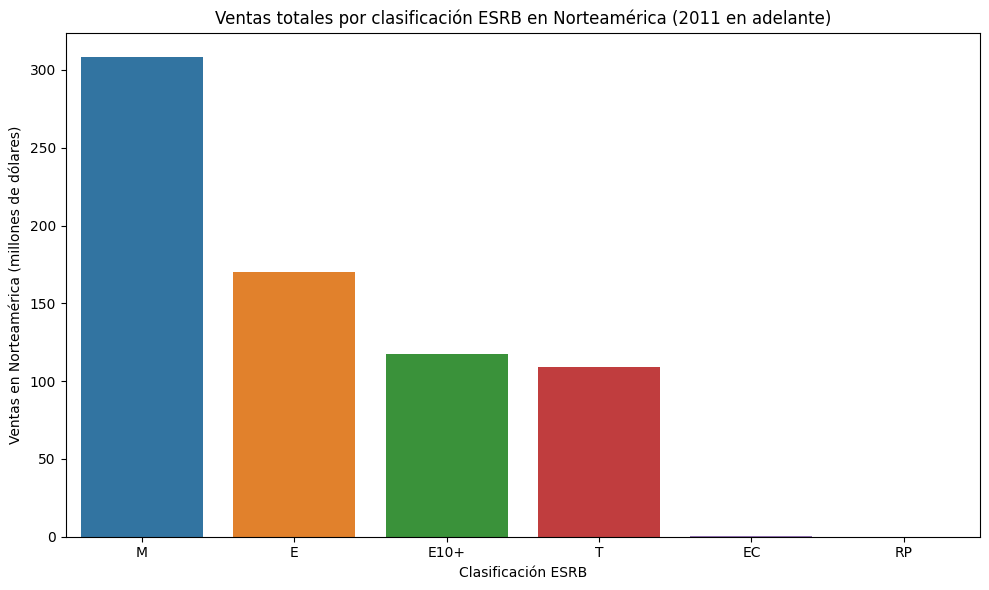

In [74]:
# Visualizar las ventas por clasificación ESRB en Norteamérica

plt.figure(figsize=(10, 6))

sns.barplot(x=ventas_esrb_na.index, y=ventas_esrb_na.values)
plt.title('Ventas totales por clasificación ESRB en Norteamérica (2011 en adelante)')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en Norteamérica (millones de dólares)')
plt.tight_layout()
plt.show()

In [75]:
# Calcular las ventas totales por clasificación ESRB en Europa

ventas_esrb_eu = datos_analisis.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

ventas_esrb_eu

rating
M       250.26
E       141.73
T        83.16
E10+     78.00
RP        0.03
EC        0.00
Name: eu_sales, dtype: float64

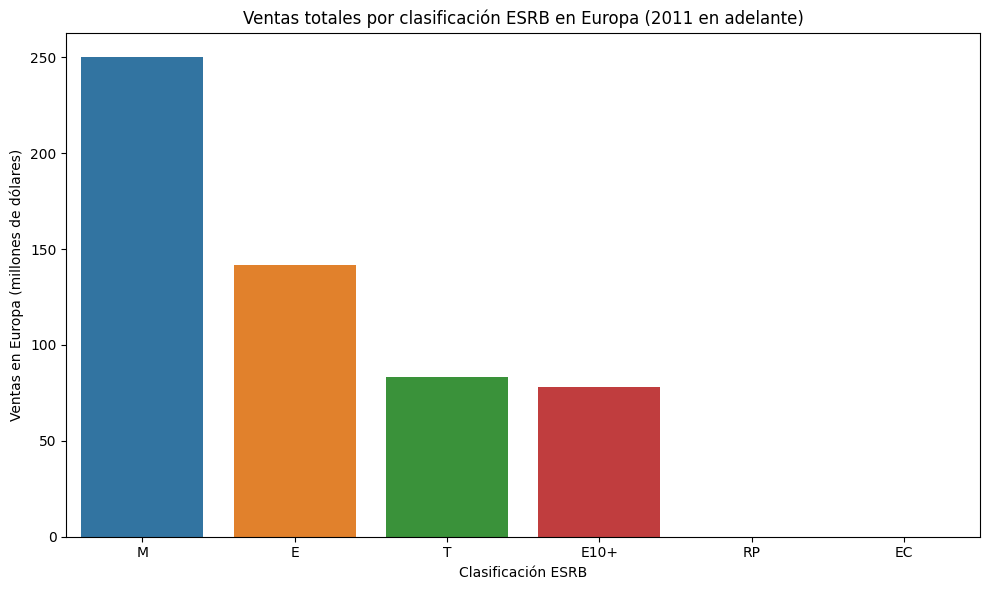

In [76]:
# Visualizar las ventas por clasificación ESRB en Europa

plt.figure(figsize=(10, 6))

sns.barplot(x=ventas_esrb_eu.index, y=ventas_esrb_eu.values)
plt.title('Ventas totales por clasificación ESRB en Europa (2011 en adelante)')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en Europa (millones de dólares)')
plt.tight_layout()

plt.show()

In [77]:
# Calcular las ventas totales por clasificación ESRB en Japón

ventas_esrb_jp = datos_analisis.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

ventas_esrb_jp

rating
E       36.68
T       33.39
M       26.14
E10+    11.23
EC       0.00
RP       0.00
Name: jp_sales, dtype: float64

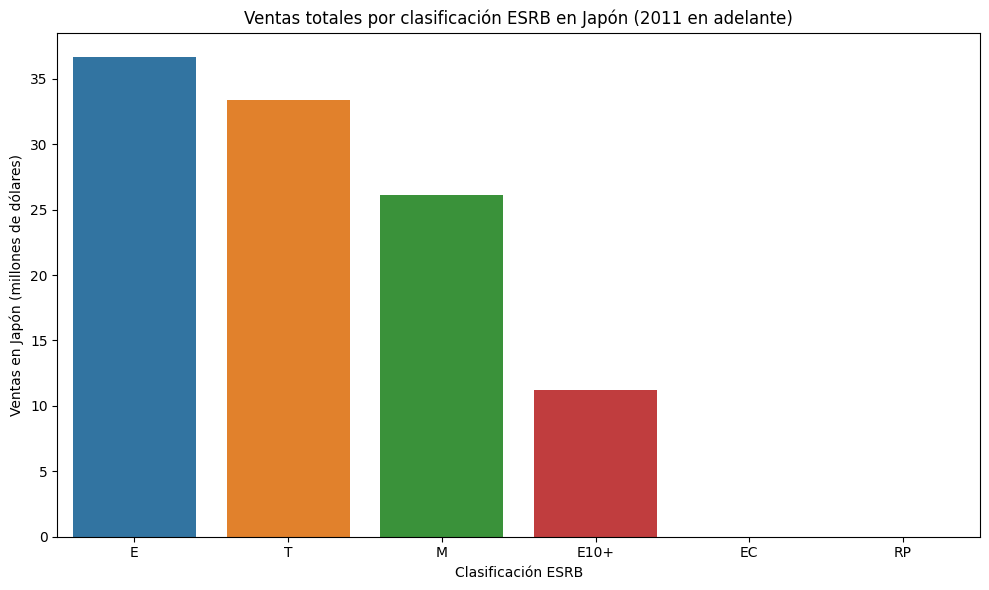

In [78]:
# Visualizar las ventas por clasificación ESRB en Japón

plt.figure(figsize=(10, 6))

sns.barplot(x=ventas_esrb_jp.index, y=ventas_esrb_jp.values)
plt.title('Ventas totales por clasificación ESRB en Japón (2011 en adelante)')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en Japón (millones de dólares)')
plt.tight_layout()

plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [73–78]</b> <a class="tocSkip"></a><br>
Buen trabajo al analizar el impacto de la clasificación ESRB por región. Las gráficas están bien construidas y las observaciones destacan diferencias claras entre regiones. Se aprecia un análisis maduro sobre cómo el contenido y la edad objetivo pueden influir en las ventas.
</div>


Al inicio del proyecto se hace una pequeña explicación de esta clasificación. Si embargo, en este punto se hace un pequeño recuento de lo que significa cada letra.
ESRB "Entertainment Software Rating Board" es una junta de clasificación de software de entretenimiento. Las clasificaciones las realiza por grupos de edades de los usuarios de la siguiente manera:
- E (Todos): Adecuado para todas las edades. 
- E10+ (Todos +10): Para mayores de 10 años.
- T (Adolescentes): Para mayores de 13 años.
- M (Maduro): Para mayores de 17 años.
- AO (Adultos únicamente): Para mayores de 18 años.
- RP (Sin clasificar): No se ha asignado una calificación final de ESRB.

Observando las ventas totales por clasificación ESRB para las tres regiones Norteamérica, Europa y Japón, así como las gráficas para visualizar de una forma más práctica esta información puedo concluir lo siguiente:
1. Para la región de Norteamérica la clasificación ESRB que más vende es la clasificación M, mientras que la segunda clasificación que más vende es la E seguida por E10+, la suma de las ventas de estas dos clasificaciones prácticamente iguala las ventas de la clasificación M. Adicionalmente, la clasificación ESRB que ocupa el cuarto lugar en ventas en Norteamérica es la T, teniendo ventas un poco menores a la clasificación E10+.

2. Para la región de Europa la clasificación ESRB que más vende igualmente es la clasificación M, mientras que la segunda clasificación que más vende es la E seguida por T. Al que en la región de Norteamérica las clasificaciones que ocupa el segundo E y tercer T puesto en ventas, al sumar las ventas de estas, casi igualan las ventas de la clasificación M. Adicionalmente, la clasificación ESRB que ocupa el cuarto lugar en ventas en Europa es la E10+, teniendo ventas un poco menores a la clasificación T.

3. Las regiones de Norteamérica y Europa presentan sus mayores ventas en las clasificaciones ESRB en M y E. Sin embargo, se invirte las ventas de E10+ para Norteamérica tercer puesto, para Europa cuarto puesto. Lo mismo sucede con T en tercer puesto para Europa pero para Norteamérica es el cuarto puesto.

4. Para la región de Japón la clasificación ESRB que más vende es la clasificación E, mientras que la segunda clasificación que más vende es la T seguida por M. A diferencia de las otras dos regiones, la clasificación M, ocupa en la región de Japón el tercer pues en la cuarta posición en ventas se encuentra la clasificación E10+. Otra diferencia con la región de Japón, es que aunque si hay diferencia entre las ventas por clasificación, las ventas entre los tres primeros lugares van descendiendo de forma escalonada y no tan marcada como en Norteamérica y Europa donde si muestra una notable preferencia por juegos con clasificación ESRB M.

## Paso 5. Prueba de hipótesis estadísticas

### Probar hipótesis nula Ho: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas 

In [79]:
# Filtrar para obtener las calificaciones de los usuarios para la plataforma XOne

xone_score = datos_analisis[datos_analisis['platform'] == 'XOne']['user_score']

xone_score


27      7.5
44      7.9
47      5.4
59      6.4
70      6.2
       ... 
3982    8.2
3987    6.6
3989    7.5
4000    6.7
4004    7.5
Name: user_score, Length: 247, dtype: float64

In [80]:
# Filtrar para obtener las calificaciones de los usuarios para la plataforma PC

pc_score = datos_analisis[datos_analisis['platform'] == 'PC']['user_score']

pc_score


52      4.0
82      8.1
115     3.9
121     5.9
134     7.5
       ... 
3998    7.5
4007    7.5
4013    7.6
4014    5.8
4016    7.2
Name: user_score, Length: 389, dtype: float64

In [81]:
# Utilizara prueba t de Students para la prueba de la hipótesis nula Ho

alpha = 0.05

results = st.ttest_ind(xone_score, pc_score)

print('valor_p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazar la hipótesis nula, Ho')
else:
    print('No se puede rechazar la hipótesis nula, Ho')

valor_p: 0.35419963525498976
No se puede rechazar la hipótesis nula, Ho


El valorde significancia para el valor p, lo establezco como alpha = 0.05.

Hipótesis nula, Ho: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. 

No se puede rechazar esta hipótesis ya que por medio de esta prueba de t de Student se obtuvo un valor p mayor al valor de significancia alpha que establecí para esta prueba, dando como resultado un valor p de 0.3542. Esto indica que la probabilidad de que ocurra la Ho es del 35.42 %. 

Lo anterior puede significar que los valores promedio de las calificaciones para ambas plataformas es la misma o muy similar. Para probar esto, a continuación mostraré los resultados de la media y la mediana para tener un mejor entendimiento.


In [82]:
# Mostrar los valores de la media y la mediana para las calificaciones de las plataformas XOne y PC

print('Valor de la media para las calificaciones de la plataforma XOne:', xone_score.mean())

print('Valor de la media para las calificaciones de la plataforma PC:', pc_score.mean())

print()

print('Valor de la mediana para las calificaciones de la plataforma XOne:', xone_score.median())

print('Valor de la mediana para las calificaciones de la plataforma PC:', pc_score.median())

Valor de la media para las calificaciones de la plataforma XOne: 6.778947368421053
Valor de la media para las calificaciones de la plataforma PC: 6.672750642673521

Valor de la mediana para las calificaciones de la plataforma XOne: 7.2
Valor de la mediana para las calificaciones de la plataforma PC: 7.3


<div class="alert alert-block alert-success">
<b>Celdas [79–82]</b> <a class="tocSkip"></a><br>
La prueba de hipótesis entre plataformas está correctamente formulada y justificada. Se usa la prueba t con parámetros adecuados, se interpreta correctamente el p-valor y se complementa con análisis descriptivo (media y mediana), lo cual enriquece la discusión.
</div>


Se puede observar que los valores del promedio de las calificaciones de los usuarios para ambas plataformas XOne (6.78) y PC (6.67), son casi iguales, comprobando con esto que la hipótesis nula, Ho donde se estableció que: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas, no se puede rechazar.

Cabe anotar que los valores de las medianas en ambas plataformas también son muy similares, XOne (7.2) y PC (7.3).

### Probar hipótesis alternativa H1: Las calificaciones promedio de los usuarios para los generos de Acción y Deportes son diferentes

In [83]:
# Filtrar para obtener las calificaciones de los usuarios para el género 'Action'

action_score = datos_analisis[datos_analisis['genre'] == 'Action']['user_score']

action_score

0       8.2
1       8.1
9       8.3
21      6.6
34      8.3
       ... 
4008    7.5
4012    7.5
4013    7.6
4015    7.5
4019    7.5
Name: user_score, Length: 1269, dtype: float64

In [84]:
# Filtrar para obtener las calificaciones de los usuarios para el género 'Sports'

sports_score = datos_analisis[datos_analisis['genre'] == 'Sports']['user_score']

sports_score

20      4.3
25      5.0
35      7.5
36      4.3
40      5.7
       ... 
3933    1.4
3951    7.5
3986    7.5
3987    6.6
4011    7.5
Name: user_score, Length: 389, dtype: float64

In [85]:
# Utilizara prueba t de Students para la prueba de la hipótesis alternativa H1

alpha = 0.05

results = st.ttest_ind(xone_score, sports_score)

print('valor_p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazar la hipótesis alternativa, H1')
else:
    print('No se puede rechazar la hipótesis alternativa, H1')
    

valor_p: 0.0002343687812584241
Rechazar la hipótesis alternativa, H1


<div class="alert alert-block alert-warning">
<b>Celda [85]</b> <a class="tocSkip"></a><br>
La prueba t entre géneros está bien planteada, pero parece haber un error en el conjunto de datos utilizado: se compara `xone_score` con `sports_score`, en lugar de `action_score` con `sports_score`. Sería importante corregirlo para que la hipótesis esté alineada con los datos analizados.
</div>


El valorde significancia para el valor p, lo establezco como alpha = 0.05.

Hipótesis alternativa, H1: Las calificaciones promedio de los usuarios para los géneros Ación y Deportes son diferentes. 

Se rechaza esta hipótesis ya que por medio de esta prueba de t de Student se obtuvo un valor p menor al valor de significancia alpha que establecí para esta prueba, dando como resultado un valor p de 0.000234. Esto indica que la probabilidad de que ocurra la H1 es del 0.0234 %. 

En ambas hipotesis apliqué la prueba t de Student debido a que son muestras independientes. Comparé el valor p obtenido de la prueba con el valor alfa (0.05) ya que es el valor en el que se asume que hay una probabilidad de 5% de caer en un error, es decir, no aceptar la hipótesis planteada. Si el valor p es mayo que alfa, no se rechaza la hipótesis planteada sea la hipótesis nula o alternativa. Por otro lado, si el valor p es menor que el valor alfa, se rechaza la hipótesis planteada (nula o alternativa).

Debido a lo anterior, en este análisis de las hipítesis en este proyecto, no se puede rechazar la hipótesis nula pero si se rechaza la hipótesis alternativa.

## Paso 6. Conclusión general

El objetivo de este proyecto era identificar patrones que determinaran si un juego tiene éxito o no para planificar campañas publicitarias, con la información analizada y seleccionada especialmente para proyectar ventas para el año 2017. Así que, después de realizar todo el análisis de ventas, plataformas, géneros de juegos y regiones se puede concluir lo siguiente:

1.	A los largo de los años, han existido gran cantidad de juegos, en la época de los 90 y 2000 se realizaban muchos más lanzamientos de juegos por año que la década de los 2010 en donde se observa una notable disminución de lanzamientos por año, pudiendo indicar que el mercado de los usuarios se fue centrando en algunos géneros y plataformas por los cuales se sintieran más interesados. 

2.	De acuerdo a la información obtenida en la tabla 'aparecer_desaparecer_plataformas',  las plataformas que hasta el año 2016 presentan ventas, son 9 plataformas. Se observa en la tabla  que una de ellas PC ha estado vigente por más de 30 años. Las otras plataformas fueron lanzadas entre el año 2005 y 2015, presentando una permanencia en el mercado entre 3 y 11 años estas plataformas son PS3, PS4, PSV, 3SD, Wii, WiiU, X360 Y XOne.

3.	En la siguiente relación muestro las plataformas vigentes en el 2016, las ventas totales, el año de lanzamiento y los años que lleva de vigencia.

•	PS4 (69.25, 2013, 3)
•	WOne (26.15, 2013, 3)
•	3SD (15.14, 2011, 5)
•	PC (5.25, 1985, 31)
•	WiiU (4.60, 2012, 4)
•	PSV (4.25, 2011, 5)
•	PS3 (3.60, 2006, 10)
•	X360 (1.52, 2005, 11)
•	Wii (0.18, 2006, 10)

Por lo anterior, concluí que los datos que se deben tener en cuenta para construir un modelo para el 2017, serían los datos del año 2011 en adelante debido a que desde ese año han lanzado las plataformas que al presente (año 2016) han mostrado mayores ventas como son las plataformas 3SD, PSV, PS4, WOne. Considero prudente también incluir en el análisis la plataforma PC ya que es la cuarta plataforma que presenta más ventas en el 2016 pese a haber sido lanzada en el año 1985.

4.	Después de analizar las ventas en la tabla ventas_totales_analisis y de la gráfica Tendencia de ventas anuales por plataforma, específicamente revisando los últimos tres años (2014, 2015 y 2016) considerando que para el año 2016 la información no se encuentra completa, puedo concluir que las plataformas potencialmente rentables para el modelo a construir para el 2017 son PS4 (2013), XOne (2013) y 3SD (2011) porque presentan las ventas más altas.
5.	De las correlaciones obtenidas para la plataforma PS4, se puede concluir que las calificaciones tanto de los usuarios como de los críticos pueden favorece y o no las ventas de los juegos. El tener una buena calificación para un juego en determinada plataforma es un punto a tener en cuenta cuando se realizan ventas, por lo tanto las calificaciones si pueden afectar las ventas.  

6.	En la tabla comparativo_ventas, donde se compara las ventas de cada juego que está presente en varias plataformas, se obtienen 796 entradas. Posiblemente son 796 juegos que están en más de 1 plataforma de video juegos. Se puede ver en los datos obtenidos, que las plataformas que más juegos multiplataformas contiene son PS3 (540), X360 (412), PS4 (316), PC (232), XOne (224). Algunas plataformas presentan muy pocos juegos como la PS2 o DS, esto puede indicar que son plataformas que tienen pocas ventas y que tienden a desaparecer. 

7.	Ahora bien, en esta tabla, comparativo_ventas, se encuentra que en casi todos los juegos que están presentes en más de 1 plataforma, los precios de las ventas varían entre plataformas. Corriendo el código varias veces observe que en la mayoría de las veces, las ventas de los juegos son un poco mayor en unas plataformas que en otras, y en pocas ocasiones tienen el mismo valor. Por lo que noté, es más frecuente que el valor de las ventas sean mayor en plataformas que tienen más juegos como en la plataforma PS3 o X360.

8.	Analizando la gráfica de 'Ventas de juegos por género' se observa que los juegos que presentan ventas más altas son los juegos de acción, seguido por los juegos de tiros 'shooter', juegos de rol y de deportes. Los géneros que presentan menos ventas son los juegos de aventura, estrategia y los puzzle.
Ahora, comparando la gráfica de 'Cantidad de juegos por género' y la de 'Ventas de juegos por género' se encuentra que en el caso de los juegos con más cantidad de juegos y los de mayores ventas, en primer lugar está los del género de acción. El género que está en segundo lugar en ventas es 'shooter', pero este juego está en quinto lugar en cantidad de juegos, lo que puede indicar que son juegos muy atractivos para los usuarios y de un mayor costo en comparación a juegos de otros géneros. Los otros juegos que se pueden considerar rentables son los juegos de rol y los de deportes.
Por otra parte, aunque los juegos de aventura ocupan el tercer lugar en cantidad de juegos, son uno de los que menos ventas tiene, pudiendo indicar que es un género que ha perdido interés entre los usuarios. Tanto en la gráfica de 'Cantidad de juegos por género' y la de 'Ventas de juegos por género' los géneros que se encuentra en los dos últimos lugares son los de estarategia y los puzzle reflejando que al ser pocas opciones de juegos, pudieran ser de igual forma poco interesantes para los usuarios registrando las ventas más bajas en video juegos.

9.	Analizando la información obtenida en los cálculos sobre las ventas por plataforma encontré que las preferencias de cada región son las siguientes:
- Norteamérica: X360, PS3, PS4, XOne, 3SD
- Europa: PS3, PS4, X360, 3SD, PC
- Japón: 3SD, PS3, PSP, PSV, PS4
Los usuarios de Norteamérica y de Europa tienen intereses en plataformas más similares que los usuarios de Japón.

10.	De la información obtenida sobre la preferencia de los géneros en las diferentes regiones, se observa que los gustos entre los usuarios de Norteamérica y Europa son muy parecidos pues comparten los géneros de action, shooter, sport y role-playing en el mismo orden de preferencia según sus ventas.
Por otra parte para la región de Japón sus gustos varían un poco pues de estos cuatro géneros, Japón presenta en el top 5 solo los géneros role_playing como su juego preferido seguido por los juegos de action.
En las tres regiones se observa que las ventas de los géneros de juegos posicionados en los dos primeros lugares son muy superiores a los otros géneros que están el top 5. Lo que indica que para la región de Norteamérica y Europa los géneros que tiene mayores ventas son action y shooter, mientras que para la región de Japón es role_playing y action.

11.	Observando las ventas totales por clasificación ESRB para las tres regiones y las gráficas para visualizar de una forma más práctica esta información puedo concluir lo siguiente:
-	Norteamérica: la clasificación ESRB que más vende es la clasificación M, mientras que la segunda clasificación que más vende es la E seguida por E10+, la suma de las ventas de estas dos clasificaciones prácticamente iguala las ventas de la clasificación M. Adicionalmente, la clasificación ESRB que ocupa el cuarto lugar en ventas en Norteamérica es la T, teniendo ventas un poco menores a la clasificación E10+.

-	Europa: la clasificación ESRB que más vende igualmente es la clasificación M, mientras que la segunda clasificación que más vende es la E seguida por T. Al que en la región de Norteamérica las clasificaciones que ocupa el segundo E y tercer T puesto en ventas, al sumar las ventas de estas, casi igualan las ventas de la clasificación M. Adicionalmente, la clasificación ESRB que ocupa el cuarto lugar en ventas en Europa es la E10+, teniendo ventas un poco menores a la clasificación T.

-	Japón la clasificación ESRB que más vende es la clasificación E, mientras que la segunda clasificación que más vende es la T seguida por M. A diferencia de las otras dos regiones, la clasificación M, ocupa en la región de Japón el tercer pues en la cuarta posición en ventas se encuentra la clasificación E10+. Otra diferencia con la región de Japón, es que aunque si hay diferencia entre las ventas por clasificación, las ventas entre los tres primeros lugares van descendiendo de forma escalonada y no tan marcada como en Norteamérica y Europa donde si muestra una notable preferencia por juegos con clasificación ESRB M.

12.	Creo que con esto ya se tiene información muy importante para realizar las campañas publicitarias de ventas de video juegos para las tres regiones más importantes Norteamérica, Europa y Japón teniendo en cuenta el comportamiento de los usuarios con base en las plataformas preferidas, los géneros más jugados y las calificaciones tanto de críticos como de usuarios. También es importante tener en cuenta la clasificación ESRB porque si influye los intereses en los usuarios de las diferentes regiones.


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Excelente trabajo, Costanza! Tu proyecto está muy completo, bien estructurado y con un enfoque analítico riguroso. Destacan especialmente la justificación de cada paso, la claridad en los gráficos y el dominio de los conceptos estadísticos aplicados. Tal como está, es un trabajo muy sólido. ¡Sigue así!
</div>
